In [1]:
from ast import literal_eval
import numpy as np
from sklearn.cluster import SpectralClustering
import seaborn as sns

In [11]:
with open("coad_subnetwork_mutations_miRNA.txt",'r') as file:
    data_matrix = literal_eval(file.readline())
    data_matrix = np.array(data_matrix)
    mean_mutations_per_subnet = np.mean(data_matrix[:,:16],axis=1)
    stacked_vector = np.tile(mean_mutations_per_subnet, (16, 1)).T
    data_matrix[:,:16] = data_matrix[:,:16] - stacked_vector

data_matrix[:,:]

array([[ 3.125     ,  4.125     ,  2.125     , ...,  0.33656618,
        -0.4686835 ,  0.06128893],
       [ 0.75      ,  0.75      , -0.25      , ..., -0.77646597,
        -0.50936321, -0.59508195],
       [ 0.        ,  0.        ,  0.        , ...,  0.44545507,
         0.74130287, -0.6747451 ],
       ...,
       [ 0.875     ,  0.875     , -0.125     , ...,  0.73652793,
        -0.33440949, -0.17422147],
       [ 0.        ,  0.        ,  0.        , ..., -0.25985652,
        -0.65561795, -0.39079213],
       [-0.125     , -0.125     ,  0.875     , ...,  0.22182672,
        -0.42894339, -0.6747451 ]])

<Axes: >

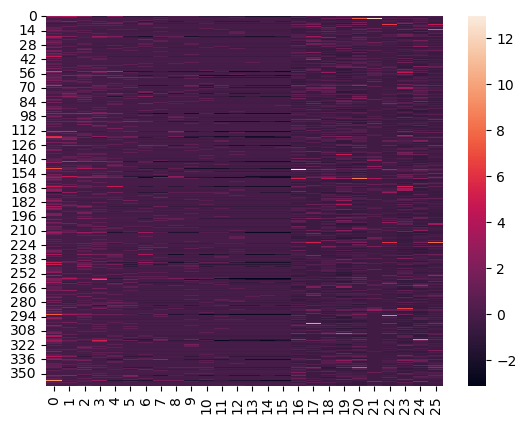

In [12]:
sns.heatmap(data_matrix[:,:])

This looks good. The first couple of subnetworks have the most variance across genes (probably since their strengths are highest). But we still need to perform the clustering - we know nothing about whether our results mean anything without that part. But the reason I wanted to focus on the variance from mean and not the mean itself is because the purpose of taking subnetworks is lost if Im just using the average mutations across subnets. Obviously since cancer is a very weird phenomenon involving several mutations across genes, certain samples simply have more mutations in all subnetworks than others, and inter-subnetwork relationships aren't as prominent as the inter-sample relationships in number of mutations. But we want to see if the subnetwork information itself could be of any use to the clustering. Since variance across genes is negligible compared to across samples, we standardise wrt to the variance across samples (shift whole thing to zero) and only plot the variance across subnetworks. We can still see some significant clusters among samples with this info - showing that certain samples are "over-mutated" in some subnetworks than others. We are talking about differential mutation rate for a given subnetwork. This information might be handy in clustering.

In [13]:
with open("coad_differential_mutations_miRNA.txt",'w') as file:
    file.write(str(data_matrix.tolist()))